In [2]:
import pandas as pd

from keras.models import Model, Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
gender = pd.read_csv('/kaggle/input/gender/Transformed Data Set - Sheet1.csv')

In [4]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [5]:
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [6]:
gender.nunique()

Favorite Color          3
Favorite Music Genre    7
Favorite Beverage       6
Favorite Soft Drink     4
Gender                  2
dtype: int64

In [7]:
gender.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [8]:
gender['Gender'].describe()

count     66
unique     2
top        F
freq      33
Name: Gender, dtype: object

No null values -> no need to do step below

In [ ]:
#gender['columnWithNulls'] = gender['columnWithNulls'].fillna(value=gender['columnWithValues'].mean()) 

Since our Gender column is not integer I have to convert it to use to_categorical in next step:

In [9]:
y_int = gender['Gender'].map({'F': 0, 'M': 1}).values  

In [10]:
#y = gender.iloc[:]['Gender'].values
num_classes = gender['Gender'].nunique()
Y = to_categorical(y_int, num_classes=num_classes)
print(Y.shape)

(66, 2)


Because later Keras refuses to train on objects (strings -> object after changing to numpy array) We have to encode everything to float:

In [11]:
# gender.drop(['Gender'], axis='columns', inplace=True)
# X = gender.values
X = pd.get_dummies(gender.drop(['Gender'], axis=1)) 
X = X.astype('float32') 
print(X.shape)

(66, 20)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)
print(X_train.shape)

(44, 20)


Twice as many features at the beginning in Dense layer (4 features -> 8)

In [13]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X.shape[1]]))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-29 21:47:26.291798: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214 (856.00 B)

 Trainable params: 214 (856.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size=10, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.4883 - loss: 0.7104 - val_accuracy: 0.4545 - val_loss: 0.7078
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4799 - loss: 0.7081 - val_accuracy: 0.4545 - val_loss: 0.7074
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4390 - loss: 0.7243 - val_accuracy: 0.4545 - val_loss: 0.7072
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5167 - loss: 0.7013 - val_accuracy: 0.4545 - val_loss: 0.7069
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5236 - loss: 0.6734 - val_accuracy: 0.4545 - val_loss: 0.7068
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4958 - loss: 0.6972 - val_accuracy: 0.4091 - val_loss: 0.7066
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4903 - loss: 0.7059 - val_accuracy: 0.4091 - val_loss: 0.7059
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5292 - loss: 0.6695 - val_accuracy: 0.4091 - val_loss: 0.7054


In [16]:
print(history.history)

{'accuracy': [0.47727271914482117, 0.47727271914482117, 0.4545454680919647, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5227272510528564, 0.5227272510528564, 0.5454545617103577, 0.5454545617103577, 0.5454545617103577, 0.5454545617103577, 0.5454545617103577, 0.5681818127632141, 0.5681818127632141, 0.5681818127632141, 0.5681818127632141, 0.5909090638160706, 0.5909090638160706, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718, 0.6136363744735718], 'loss': [0.7256236672401428, 0.7169263362884521, 0.7109941244125366, 0.704395055770874, 0.6977894306182861, 0.6933899521827698, 0.6895473599433899, 0.6845350861549377, 0.6808724403381348, 0.6773561239242554, 0.6735515594482422, 0.670913577079773, 0.6674829125404358, 0.6647765040397644, 0.661339521408081, 0.6580319404602051, 0.6549603939056396, 0.6516782641410828, 0.6480801105499268, 0.6453791260719299, 0.6418697834014893, 0.6379153728485107, 0.6347803473

[]

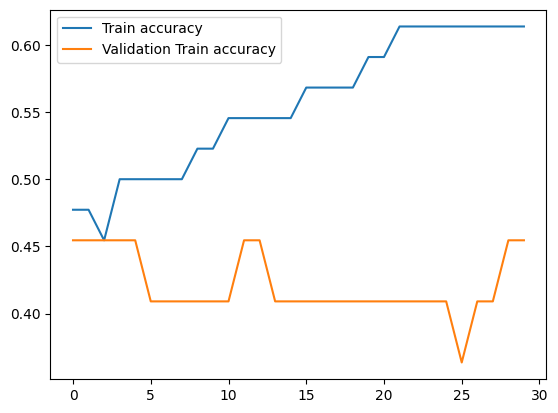

In [17]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Train accuracy')
plt.legend()
plt.plot()

I'll try to decrease num of epochs since there is clearly an overfitting

In [31]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[X.shape[1]]))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 2)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214 (856.00 B)

 Trainable params: 214 (856.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.3967 - loss: 0.7098 - val_accuracy: 0.4545 - val_loss: 0.7102
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4058 - loss: 0.7066 - val_accuracy: 0.4545 - val_loss: 0.7112
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4078 - loss: 0.7032 - val_accuracy: 0.4545 - val_loss: 0.7124
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4203 - loss: 0.6988 - val_accuracy: 0.5000 - val_loss: 0.7137
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4509 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.7156
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5389 - loss: 0.6858 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4333 - loss: 0.7041 - val_accuracy: 0.5000 - val_loss: 0.7188
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5306 - loss: 0.6841 - val_accuracy: 0.5000 - val_loss: 0.7206

[]

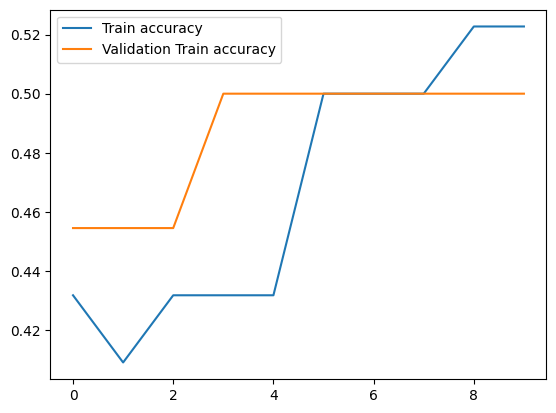

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_data=(X_test, y_test))
print(history.history)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Train accuracy')
plt.legend()
plt.plot()